In [1]:
import os
dataset_path = "D:\dataset"
print(os.listdir(dataset_path))

['train', 'validation']


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\ViniciusTessele\AppData\Local\Temp\ipykernel_17608\2953599053.py:2: SyntaxWarning: invalid escape sequence '\d'
  dataset_path = "D:\dataset"


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight

In [3]:
# Configuração de diretórios
train_dir = 'D:\\dataset\\train'
val_dir = 'D:\\dataset\\validation'

# Parâmetros de pré-processamento
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [4]:
# Geradores de dados com augmentação para o treinamento
train_datagen = ImageDataGenerator(
    rescale=1.0/255,              # Normalização das imagens
    rotation_range=20,            # Rotação aleatória
    width_shift_range=0.2,        # Deslocamento horizontal
    height_shift_range=0.2,       # Deslocamento vertical
    shear_range=0.2,              # Transformação em cisalhamento
    zoom_range=0.2,               # Zoom aleatório
    horizontal_flip=True,         # Inversão horizontal
    fill_mode='nearest'           # Preenchimento dos pixels ausentes
)

val_datagen = ImageDataGenerator(rescale=1.0/255)  # Apenas normalização

Found 2301 images belonging to 2 classes.
Found 2280 images belonging to 2 classes.
Distribuição das classes - Treinamento:
Outro: 1270
R7: 1031


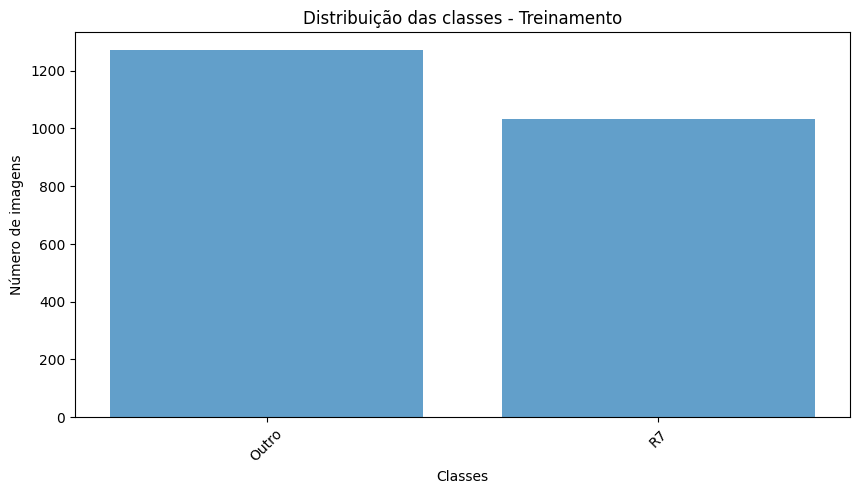

Distribuição das classes - Validação:
Outros: 1378
R7: 902


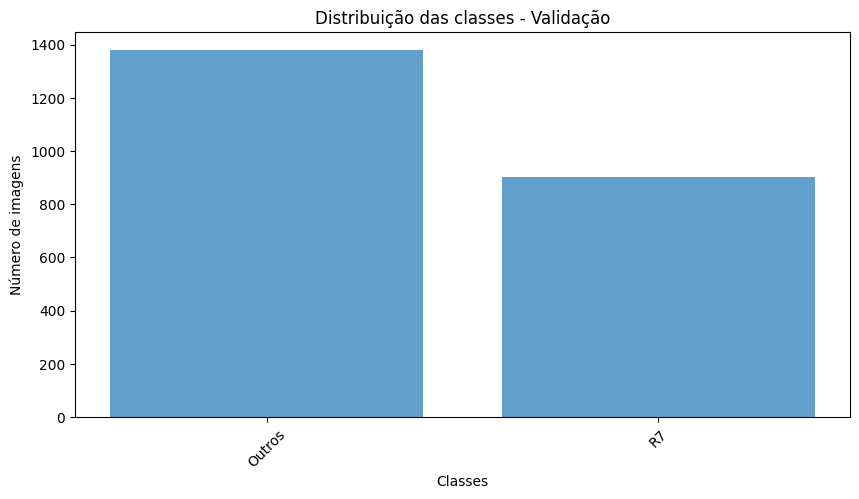

Pesos das classes: {0: 0.9059055118110236, 1: 1.1159068865179438}


In [6]:
# Carregar dados de treinamento e validação
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Verificando a distribuição das classes
def plot_class_distribution(generator, title):
    class_counts = np.bincount(generator.classes)
    class_labels = list(generator.class_indices.keys())
    
    print(f"Distribuição das classes - {title}:")
    for label, count in zip(class_labels, class_counts):
        print(f"{label}: {count}")
    
    plt.figure(figsize=(10, 5))
    plt.bar(class_labels, class_counts, alpha=0.7)
    plt.xlabel("Classes")
    plt.ylabel("Número de imagens")
    plt.title(f"Distribuição das classes - {title}")
    plt.xticks(rotation=45)
    plt.show()

plot_class_distribution(train_generator, "Treinamento")
plot_class_distribution(val_generator, "Validação")

# Balanceamento das classes usando pesos
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights)}
print("Pesos das classes:", class_weight_dict)

In [7]:
# Construção do modelo de rede neural
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='sigmoid')  # Saída para classes
])

c:\Users\ViniciusTessele\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compilação do modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\ViniciusTessele\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 742s 10s/step - accuracy: 0.8345 - loss: 8.1185 - val_accuracy: 0.7934 - val_loss: 0.3627
Epoch 2/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 698s 10s/step - accuracy: 0.9791 - loss: 0.1137 - val_accuracy: 0.8947 - val_loss: 0.4907
Epoch 3/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 717s 10s/step - accuracy: 0.9835 - loss: 0.0500 - val_accuracy: 0.9066 - val_loss: 0.2237
Epoch 4/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 719s 10s/step - accuracy: 0.9926 - loss: 0.0244 - val_accuracy: 0.8798 - val_loss: 0.3169
Epoch 5/5
72/72 ━━━━━━━━━━━━━━━━━━━━ 704s 10s/step - accuracy: 0.9937 - loss: 0.0219 - val_accuracy: 0.8794 - val_loss: 0.2270
72/72 ━━━━━━━━━━━━━━━━━━━━ 324s 5s/step - accuracy: 0.8855 - loss: 0.2159


Validation Accuracy: 0.88
72/72 ━━━━━━━━━━━━━━━━━━━━ 321s 4s/step


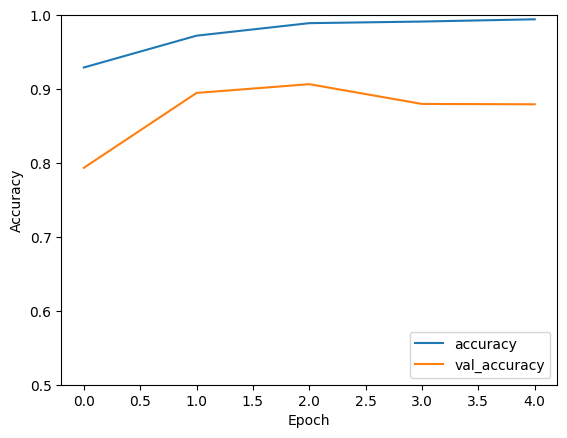

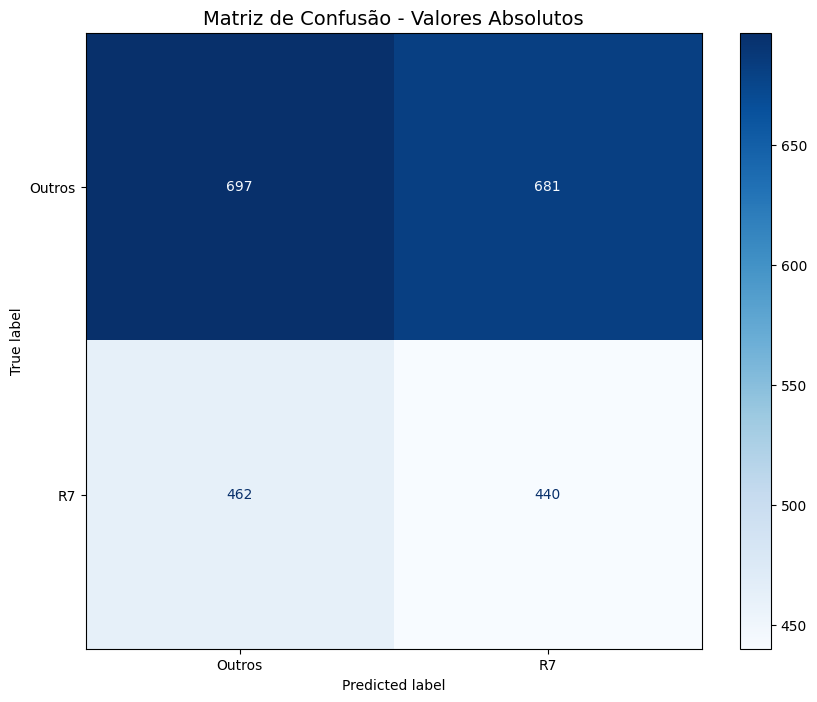

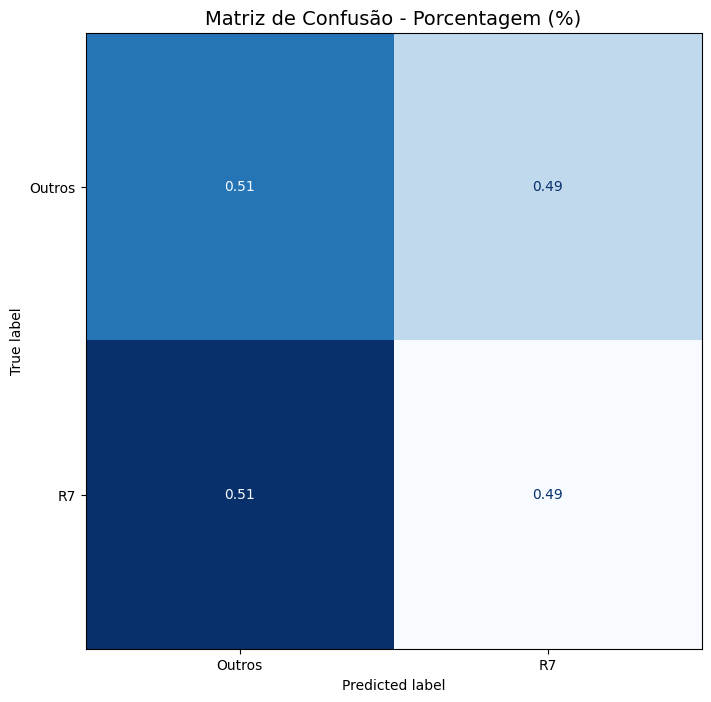

In [9]:
history = model.fit(
    train_generator,
    epochs=5,                   # Número de épocas
    validation_data=val_generator
)

# Avaliação final no conjunto de validação
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.2f}")

# Salvar o modelo treinado
model.save('simple_cnn_model.h5')

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Previsões no conjunto de validação
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)

# Valores absolutos
plt.figure(figsize=(10, 8))
disp_abs = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=val_generator.class_indices.keys())
disp_abs.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('Matriz de Confusão - Valores Absolutos', fontsize=14)
plt.show()

# Valores normalizados
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 8))
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_normalized, display_labels=val_generator.class_indices.keys())
disp_norm.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title('Matriz de Confusão - Porcentagem (%)', fontsize=14)
plt.show()
